In [1]:
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import os
import pathlib
import pandas as pd
import numpy as np
import re
import upsetplot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns
from proteobench.modules.quant.quant_lfq_ion_DIA_Astral import DIAQuantIonModuleAstral
from proteobench.io.params.alphadia import extract_params as extract_alphadia_params
from proteobench.io.params.diann import extract_params as extract_diann_params
from proteobench.io.params.fragger import extract_params as extract_fragpipe_params
from proteobench.io.params.maxquant import extract_params as extract_maxquant_params
from proteobench.io.params.msaid import extract_params as extract_msaid_params
from proteobench.io.params.spectronaut import (
    read_spectronaut_settings as extract_spectronaut_params,
)
from proteobench.io.params.peaks import extract_params as extract_peaks_params
from proteobench.datapoint.quant_datapoint import (
    filter_df_numquant_epsilon,
    filter_df_numquant_nr_prec,
)
from proteobench.plotting.plot_quant import PlotDataPoint
from plotly.subplots import make_subplots
from proteobench.utils.server_io import get_merged_json, get_raw_data

from matplotlib.colors import to_rgba

In [2]:
MAPPERS = {
    "FragPipe (DIA-NN quant)": {
        "LFQ_Astral_DIA_15min_50ng_Condition_A_REP1 Intensity": "LFQ_Astral_DIA_15min_50ng_Condition_A_REP1",
        "LFQ_Astral_DIA_15min_50ng_Condition_A_REP2 Intensity": "LFQ_Astral_DIA_15min_50ng_Condition_A_REP1",
        "LFQ_Astral_DIA_15min_50ng_Condition_A_REP3 Intensity": "LFQ_Astral_DIA_15min_50ng_Condition_A_REP3",
        "LFQ_Astral_DIA_15min_50ng_Condition_B_REP1 Intensity": "LFQ_Astral_DIA_15min_50ng_Condition_B_REP1",
        "LFQ_Astral_DIA_15min_50ng_Condition_B_REP2 Intensity": "LFQ_Astral_DIA_15min_50ng_Condition_B_REP2",
        "LFQ_Astral_DIA_15min_50ng_Condition_B_REP3 Intensity": "LFQ_Astral_DIA_15min_50ng_Condition_B_REP3",
    },
}

# Download the data

In [5]:
# Astral
Astral_df = get_merged_json(
    repo_url="https://github.com/Proteobench/Results_quant_ion_DIA_Astral/archive/refs/heads/main.zip",
    outfile_name="astral_df.json",
    write_to_file=True,
)
hash_dict_astral = get_raw_data(df=Astral_df)
# diaPASEF
diaPASEF_df = get_merged_json(
    repo_url="https://github.com/Proteobench/Results_quant_ion_DIA_diaPASEF/archive/refs/heads/main.zip",
    outfile_name="diapasef_df.json",
    write_to_file=True,
)
hash_dict_diapasef = get_raw_data(df=diaPASEF_df)

Combined 37 JSON files into 'combined_results.json'.
Folder already exists and is not empty, skipping download: extracted_files/059a69e4eccf183869f956c4c9494d31945f6849
Folder already exists and is not empty, skipping download: extracted_files/11d1e3cad24d35b31110e82274bd0fef65435a34
Folder already exists and is not empty, skipping download: extracted_files/1bd69ca0cc5060987715afa2933b54f61fd1522e
Folder already exists and is not empty, skipping download: extracted_files/1cd54fe0ba5d6c98ef47688414c4f4c409a6eecf
Folder already exists and is not empty, skipping download: extracted_files/2115d5e394c382dc1d18f7e12ce0809311d584af
Folder already exists and is not empty, skipping download: extracted_files/2716651b296359d127ce58a3ed986d0c47d65375
Folder already exists and is not empty, skipping download: extracted_files/2eb6ecaa7ea57027adfdfd5db564f0a3d536f494
Folder already exists and is not empty, skipping download: extracted_files/3fa76efd9a76f12bb8992ef64e7edfef48eb18cd
Folder already exis

In [126]:
Astral_df.to_csv(
    "/mnt/d/Proteobench_manuscript_data/supp_tables_manuscript/Astral_df.tsv",
    index=False,
    sep="\t",
)
Astral_df

,old_new,id,software_name,software_version,search_engine,search_engine_version,ident_fdr_psm,ident_fdr_peptide,ident_fdr_protein,enable_match_between_runs,...,results.1.CV_median,results.1.CV_q75,results.1.CV_q90,results.1.CV_q95,min_precursor_mz,max_precursor_mz,min_fragment_mz,max_fragment_mz,predictors_library,scan_window
0,new,AlphaDIA_20250704_110414,AlphaDIA,1.10.4-dev0,AlphaDIA,NaN,0.01,NaN,0.01,True,...,0.229355,0.359253,0.508824,0.621283,NaN,NaN,NaN,NaN,NaN,NaN
1,new,AlphaDIA_20250605_170349,AlphaDIA,1.10.3,AlphaDIA,NaN,0.01,NaN,0.01,False,...,0.163909,0.284733,0.402962,0.513989,NaN,NaN,NaN,NaN,NaN,NaN
2,new,AlphaDIA_20251017_120515,AlphaDIA,1.12.1,AlphaDIA,NaN,0.01,NaN,0.01,False,...,0.112581,0.196675,0.304156,0.385403,400,1000,50,2000,AlphaPeptDeep,NaN
3,new,FragPipe (DIA-NN quant)_20251027_114904,FragPipe (DIA-NN quant),23.0,MSFragger,4.3,0.01,None,0.01,False,...,0.134198,0.241319,0.383391,0.490477,None,5000.0,None,None,nan,nan
4,new,DIA-NN_20251027_125531,DIA-NN,1.7.16,DIA-NN,1.7.16,0.01,NaN,NaN,True,...,0.251732,0.465276,0.688555,0.824848,200,1000,50,2000,"{'RT': 'DIANN', 'IM': 'DIANN', 'MS2_int': 'DIA...",6
5,new,DIA-NN_20251027_104249,DIA-NN,1.9.2,DIA-NN,1.9.2,0.01,NaN,NaN,True,...,0.151084,0.270793,0.420331,0.527307,400,1000,50,2000,"{'RT': 'DIANN', 'IM': 'DIANN', 'MS2_int': 'DIA...",6
6,new,Spectronaut_20250605_171849,Spectronaut,19.9.250512.62635,Spectronaut,19.9.250512.62635,0.01,None,0.01,False,...,0.180407,0.344369,0.571737,0.731712,NaN,NaN,NaN,NaN,NaN,NaN
7,new,DIA-NN_20251027_120023,DIA-NN,2.0 Academia,DIA-NN,2.0 Academia,0.01,NaN,NaN,True,...,0.150747,0.260924,0.398727,0.507699,400,1000,50,2000,"{'RT': 'DIANN', 'IM': 'DIANN', 'MS2_int': 'DIA...",5
8,new,DIA-NN_20251027_121448,DIA-NN,2.2.0 Academia,DIA-NN,2.2.0 Academia,0.01,NaN,NaN,True,...,0.150506,0.266439,0.415219,0.529896,380,980,150,2000,"{'RT': 'DIANN', 'IM': 'DIANN', 'MS2_int': 'DIA...",6
9,new,DIA-NN_20251027_114132,DIA-NN,1.9.2,DIA-NN,1.9.2,0.01,NaN,NaN,True,...,0.149856,0.273991,0.456435,0.674836,400,1000,50,2000,"{'RT': 'DIANN', 'IM': 'DIANN', 'MS2_int': 'DIA...",6


In [125]:
diaPASEF_df.to_csv(
    "/mnt/d/Proteobench_manuscript_data/supp_tables_manuscript/diaPASEF_df.tsv",
    index=False,
    sep="\t",
)

# Functions

In [13]:
def extract_all_from_hashes(hashes, data_dir="extracted_files", module=DIAQuantIonModuleAstral(token="")):
    """Extract all results from hashes."""
    all_datapoints = pd.DataFrame()
    results_dict = {}
    comments = []

    for point_hash, tool in hashes.items():
        print(f"Processing {point_hash} - {tool}")
        if not tool in results_dict:
            results_dict[tool] = {}

        raw_data_path = f"{data_dir}/{point_hash}/input_file"  # Extension can vary
        param_path = f"{data_dir}/{point_hash}/param_0."  # Extension can vary
        if tool == "AlphaDIA":
            secondary_raw_data_path = f"{data_dir}/{point_hash}/input_file_secondary"  # Extension can vary

        # Identify the correct raw data file extension. There can be only one raw data file per point_hash.
        raw_data_files = list(pathlib.Path(raw_data_path).parent.glob(f"{pathlib.Path(raw_data_path).name}.*"))
        print(f"Raw data files found: {raw_data_files}")
        # Identify the correct parameter file extension. There can be only one parameter file per point_hash.
        param_files = list(pathlib.Path(param_path).parent.glob(f"{pathlib.Path(param_path).name}.*"))
        print(f"Parameter files found: {param_files}")

        if tool == "AlphaDIA":
            secondary_raw_data = list(
                pathlib.Path(secondary_raw_data_path).parent.glob(f"{pathlib.Path(secondary_raw_data_path).name}.*")
            )
            print(f"Secondary raw data files found: {secondary_raw_data}")
            if not secondary_raw_data:
                print(
                    f"Skipping {point_hash} - {tool}: Reverting to primary raw data only - No secondary raw data file found."
                )
                secondary_raw_data_path = None
            else:
                secondary_raw_data_path = secondary_raw_data[0]

        if not raw_data_files or not param_files:
            print(f"Skipping {point_hash} - {tool}: No raw data or parameter files found.")
            continue
        raw_data_path = raw_data_files[0]
        param_path = param_files[0]

        if "FragPipe" in tool or "AlphaPept" in tool:
            param_path = open(param_path, "rb")

        extract_params_func = globals()[f"extract_{tool.replace('-', '').lower().replace(' (diann quant)', '')}_params"]
        param_data = extract_params_func(param_path).__dict__
        results_performance, all_datapoints, _ = module.benchmarking(
            raw_data_path,
            tool,
            user_input=param_data,
            all_datapoints=all_datapoints,
            input_file_secondary=secondary_raw_data_path if tool == "AlphaDIA" else None,
        )

        if "MaxQuant" in tool:
            print("adding carbamidos to maxquant")
            results_performance["precursor ion"] = results_performance["precursor ion"].apply(
                lambda x: x.replace("C", "C[Carbamidomethyl]")
            )

        results_dict[tool][point_hash] = results_performance
    # Set all datapoints to old
    all_datapoints["old_new"] = "old"
    return results_dict, all_datapoints

In [9]:
def prepare_datapoints(all_datapoints, min_quant=3):
    """Filter and calculate metrics for data points."""
    all_datapoints["median_abs_epsilon"] = [
        filter_df_numquant_epsilon(v, min_quant=min_quant) for v in all_datapoints["results"]
    ]
    all_datapoints["nr_prec"] = [filter_df_numquant_nr_prec(v, min_quant=min_quant) for v in all_datapoints["results"]]
    return all_datapoints


def plot_performance_metrics(
    all_datapoints,
    min_quant=3,
    metric="Median",
    subset=None,
    x_range=None,
    y_range=None,
    subset_col="id",
):
    """Plot performance metrics for data points."""
    if subset:
        all_datapoints = all_datapoints[all_datapoints[subset_col].isin(subset)]
    all_datapoints = prepare_datapoints(all_datapoints, min_quant=min_quant)
    plot = PlotDataPoint.plot_metric(
        all_datapoints,
        metric=metric,
        hide_annot=True,
    )
    plot.update_layout(
        xaxis=dict(range=x_range) if x_range else {},
        yaxis=dict(range=y_range) if y_range else {},
    )

    return plot


def plot_performance_metrics_all_filters(
    all_datapoints,
    x_range,
    y_range,
    metric="Median",
    subset=None,
    subset_col="id",
):

    if subset:
        all_datapoints = all_datapoints[all_datapoints[subset_col].isin(subset)]

    plots = []
    for min_quant in range(1, 7):
        datapoints = prepare_datapoints(all_datapoints, min_quant=min_quant)
        plot = PlotDataPoint.plot_metric(datapoints, metric=metric, hide_annot=True)
        plot.update_layout(xaxis=dict(range=x_range), yaxis=dict(range=y_range))
        plots.append(plot)

    combined_fig = make_subplots(
        rows=2,
        cols=3,
        subplot_titles=[f"k={i}" for i in range(1, 7)],
        vertical_spacing=0.08,  # Reduced vertical spacing (default is 0.1)
    )

    positions = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]

    for fig, (r, c) in zip(plots, positions):
        for trace in fig.data:
            combined_fig.add_trace(trace, row=r, col=c)

            combined_fig.update_xaxes(
                range=x_range,
                row=r,
                col=c,
                tickfont=dict(size=12),  # Set tick font size
                title_font=dict(size=12),  # Set axis title font size
            )
            combined_fig.update_yaxes(
                range=y_range,
                row=r,
                col=c,
                tickfont=dict(size=12),
                title_font=dict(size=12),
            )

    # Add central x and y axis labels as annotations
    combined_fig.add_annotation(
        text=f"{metric.capitalize()}QuantError(k)",
        x=0.5,
        y=-0.07,
        showarrow=False,
        xref="paper",
        yref="paper",
        xanchor="center",
        yanchor="top",
        font=dict(size=16),
    )

    combined_fig.add_annotation(
        text="Depth(k)",
        x=-0.05,
        y=0.5,
        showarrow=False,
        textangle=-90,
        xref="paper",
        yref="paper",
        xanchor="center",
        yanchor="bottom",
        font=dict(size=16),
    )

    # General layout configuration
    combined_fig.update_layout(
        height=800,
        width=1200,
        font=dict(size=12),  # Sets font size for legend, titles, and annotations
    )

    # Remove duplicate legend items
    names = set()
    combined_fig.for_each_trace(
        lambda trace: (trace.update(showlegend=False) if (trace.name in names) else names.add(trace.name))
    )

    return combined_fig


def prepare_performance_dict(results, mappers=MAPPERS, mapper=None, subset=None):
    """Prepare a dictionary of performance results."""
    if subset:
        results = {k: {sk: v for sk, v in inner_dict.items() if sk in subset} for k, inner_dict in results.items()}
    print(results)

    performance_dict = {}
    for tool, subdict in results.items():
        print(f"Processing {tool}")
        print(f"Tool has the following runs: {subdict.keys()}")
        for run_name, df in subdict.items():
            print(f"Processing {run_name}")
            if mapper != None:
                df = df.rename(columns=mappers[mapper])
            elif tool in mappers:
                tool_mapper = mappers[tool]
                df = df.rename(columns=tool_mapper)

            df.columns = [x.replace(".mzML", "") for x in df.columns]
            performance_dict[tool] = df
    return performance_dict

In [107]:
def filter_upset_data(data, tools):
    # Filter the data so that only subsets are plotted that contain sequences from all tools, from all-but-one tool, or from only one tool
    data_index_reset = data.reset_index()
    ids = data_index_reset["id"]
    occurrences = data_index_reset.drop(columns="id")
    occurrences = occurrences.astype(int)
    row_sums = occurrences.sum(axis=1)
    # Turn row_sums into a dataframe
    row_sums = pd.DataFrame(row_sums)
    row_sums = row_sums.rename(columns={0: "Number of tools"})
    row_sums["id"] = ids
    print("number of precursor ions before filtering:")
    print(len(data_index_reset))
    filtered_data = data_index_reset[
        (row_sums["Number of tools"] == len(tools))
        | (row_sums["Number of tools"] == len(tools) - 1)
        | (row_sums["Number of tools"] == 1)
    ]
    filtered_data = filtered_data.set_index(tools)
    return filtered_data


def add_epsilons(data, df_dict):
    # Store the original index
    data_index = data.index
    # Reset the index so that the id column is available for merging
    data = data.reset_index()

    for tool, df in df_dict.items():
        # Merge the id column from df with the epsilon column from tool_df
        print(tool)
        data = data.merge(
            df[["precursor ion", "epsilon"]],
            left_on="id",
            right_on="precursor ion",
            how="left",
        )
        # data.to_csv(f"analysis_debug/{tool}_epsilon.csv")

        data = data.rename(columns={"epsilon": f"{tool}_epsilon"})
        data = data.drop(columns=["precursor ion"])

    # Set the index back to the original index
    data = data.set_index(data_index.names)
    return data


def upsetplot_from_df_dict(df_dict):
    sequence_dict = {}
    for tool, df in df_dict.items():
        # Each df should have a "sequence" column
        unique_sequences = df["precursor ion"].unique()
        # Store the sequences in a list and add it to the dictionary
        sequence_dict[tool] = set(unique_sequences)

    # Create the upset plot
    sequences = upsetplot.from_contents(sequence_dict)
    tools = list(df_dict.keys())
    filtered_sequences = filter_upset_data(sequences, tools)
    data_with_epsilons = add_epsilons(filtered_sequences, df_dict)

    return data_with_epsilons


def plot_boxplot(boxplot_data, ax, i=1):
    boxplot_data["absolute epsilon"] = boxplot_data["epsilon"].abs()

    # Draw the stripplot with a custom palette
    sns.boxplot(
        data=boxplot_data,
        x="workflow",
        y="absolute epsilon",
        hue="quantified by",
        ax=ax,
        showfliers=False,
        linewidth=1,
    )
    # sns.violinplot(data=boxplot_data, x="tool", y="epsilon", hue = "unique or all", ax=ax, inner=None, linewidth=1)

    # Add the number of observations to each boxplot

    # Improve aesthetics of labels and title
    ax.set_ylabel("AbsQuantError({})".format(i), fontsize=7, fontweight="bold")
    # rotate
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment="right")

    # Add subtle grid lines to enhance readability
    ax.yaxis.grid(True, linestyle="--", color="gray", alpha=0.7)
    ax.xaxis.grid(False)  # Only y-axis grid for cleaner look

    # make y label bigger
    ax.yaxis.label.set_size(12)

    # Hide the legend
    ax.legend_.remove()
    # Add a tighter layout for better spacing
    plt.tight_layout()


def strip_peptidoform(peptidoform):
    no_mods = re.sub(r"\[.*?\]", "", peptidoform)
    no_mods = no_mods.replace("-", "")
    return no_mods


def filter_df(df):
    df["precursor ion"] = df["precursor ion"].apply(strip_peptidoform)
    df.drop_duplicates(subset="precursor ion", inplace=True, keep="first")
    return df


def plot_upset_and_boxplot(df_dict, mapper, stripped=False):

    if stripped:
        df_dict_copy = df_dict.copy()
        df_dict_copy = {key: filter_df(val) for key, val in df_dict_copy.items()}

    else:
        df_dict_copy = df_dict.copy()

    boxplotdata = upsetplot_from_df_dict(df_dict_copy)
    fig, ax_upset = plt.subplots(1, 1, figsize=(7, 3))

    # plot upset plot
    matplotlib.rcParams.update({"font.size": 10})
    upset = upsetplot.UpSet(
        boxplotdata,
        subset_size="count",
        include_empty_subsets=False,
        sort_categories_by="input",
    )
    upset.style_subsets(min_degree=1, facecolor="#3274A1")
    upset.style_subsets(min_degree=2, facecolor="black")
    upset.style_subsets(min_degree=6, facecolor="#E1812C")
    upset.plot(fig=fig)
    ax_upset.grid(False)

    # Hide x-axis label and ticks
    ax_upset.set_xlabel("")
    ax_upset.set_xticks([])
    ax_upset.set_ylabel("")
    ax_upset.set_yticks([])

    # Hide the box
    ax_upset.spines["top"].set_visible(False)
    ax_upset.spines["right"].set_visible(False)
    ax_upset.spines["left"].set_visible(False)
    ax_upset.spines["bottom"].set_visible(False)

    for text in fig.findobj(match=plt.Text):
        text.set_fontsize(8)

    # color the same as boxplot

    # plot boxplot, sorted the same way as the upset plot
    boxplotdata = boxplotdata.reset_index()

    # this needs to be adapted to the number of tools... currently hardcoded :( sorry
    boxplotdata["index_list"] = boxplotdata[boxplotdata.columns[:6]].values.tolist()

    boxplotdata["eval"] = boxplotdata["index_list"].apply(str).map(mapper)

    # drop all ions that are neither all or unique
    boxplotdata = boxplotdata.dropna(subset=["eval"])
    boxplotdata.to_csv("boxplotdata.csv")
    epsilon_cols = [col for col in boxplotdata.columns if "_epsilon" in col]
    important_cols = epsilon_cols + ["eval"]
    boxplotdata = boxplotdata[important_cols]

    boxplotdata["eval"] = pd.Categorical(boxplotdata["eval"], categories=mapper.values(), ordered=True)
    boxplotdata = boxplotdata.sort_values("eval")

    # turn to long format for plotting
    boxplotdata_final = pd.DataFrame()
    for col in epsilon_cols:
        temp = boxplotdata[["eval", col]]
        tool = col.split("_epsilon")[0]
        ions = temp[(temp["eval"] == tool) | (temp["eval"] == "all")]
        ions["quantified by"] = ions["eval"].apply(lambda x: "all" if x == "all" else "unique")
        ions["workflow"] = tool
        ions = ions.rename(columns={col: "epsilon"})
        ions = ions.drop(columns=["eval"]).reset_index(drop=True)
        boxplotdata_final = pd.concat([boxplotdata_final, ions])

    boxplotdata_final.reset_index(drop=True, inplace=True)

    # Set the style
    fig, box_ax = plt.subplots(figsize=(10, 6))
    fig_box = plot_boxplot(boxplotdata_final, ax=box_ax)
    plt.show()
    return fig, fig_box


def plot_upset_and_boxplot_all_filters(df_dict, mapper, save_path="figures_manuscript/"):

    for i in range(1, 7):

        # filter the df dict
        df_dict_filtered = {key: value[value["nr_observed"] >= i] for key, value in df_dict.items()}

        boxplotdata = upsetplot_from_df_dict(df_dict_filtered)
        # boxplotdata.to_csv("analysis/boxplotdata_min_quant_" + str(i) + ".csv")
        fig, ax_upset = plt.subplots(1, 1, figsize=(7, 3))

        # plot upset plot
        matplotlib.rcParams.update({"font.size": 10})
        upset = upsetplot.UpSet(
            boxplotdata,
            subset_size="count",
            include_empty_subsets=False,
            sort_categories_by="input",
            show_counts=False,
        )
        upset.style_subsets(min_degree=1, facecolor="#3274A1")
        upset.style_subsets(min_degree=2, facecolor="black")
        upset.style_subsets(min_degree=5, facecolor="#E1812C")
        upset.plot(fig=fig)
        # Save the upset plot

        ax_upset.grid(False)
        # Hide x-axis label and ticks
        ax_upset.set_xlabel("")
        ax_upset.set_xticks([])
        ax_upset.set_ylabel("")
        ax_upset.set_yticks([])
        # Hide the box
        ax_upset.spines["top"].set_visible(False)
        ax_upset.spines["right"].set_visible(False)
        ax_upset.spines["left"].set_visible(False)
        ax_upset.spines["bottom"].set_visible(False)

        for text in fig.findobj(match=plt.Text):
            text.set_fontsize(8)

        fig.savefig(
            save_path + f"upset_plot_min_quant_{i}.svg",
        )

        n_tools = int((len(mapper.keys()) - 1) / 2)
        # plot boxplot, sorted the same way as the upset plot
        boxplotdata = boxplotdata.reset_index()

        boxplotdata["index_list"] = boxplotdata[boxplotdata.columns[:n_tools]].values.tolist()
        boxplotdata["eval"] = boxplotdata["index_list"].apply(str).map(mapper)

        # # drop all ions that are neither all or unique
        # boxplotdata = boxplotdata.dropna(subset=["eval"])
        epsilon_cols = [col for col in boxplotdata.columns if "_epsilon" in col]
        important_cols = epsilon_cols + ["eval"]
        boxplotdata = boxplotdata[important_cols]

        boxplotdata["eval"] = pd.Categorical(boxplotdata["eval"], categories=mapper.values(), ordered=True)
        boxplotdata = boxplotdata.sort_values("eval")

        # turn to long format for plotting
        boxplotdata_final = pd.DataFrame()
        for col in epsilon_cols:
            temp = boxplotdata[["eval", col]]
            tool = col.split("_epsilon")[0]
            ions = temp[(temp["eval"] == tool) | (temp["eval"] == "all")]
            ions["quantified by"] = ions["eval"].apply(lambda x: "all" if x == "all" else "unique")
            ions["workflow"] = tool
            ions = ions.rename(columns={col: "epsilon"})
            ions = ions.drop(columns=["eval"]).reset_index(drop=True)
            boxplotdata_final = pd.concat([boxplotdata_final, ions])

        boxplotdata_final.reset_index(drop=True, inplace=True)
        # Save the boxplot data
        # boxplotdata_final.to_csv("analysis/boxplotdata_final_min_quant_" + str(i) + ".csv")

        # Set the style
        fig, box_ax = plt.subplots(figsize=(10, 6))
        fig_box = plot_boxplot(boxplotdata_final, ax=box_ax, i=i)
        plt.title("Min. quantified ions: " + str(i))
        plt.savefig(save_path + f"boxplot_min_quant_{i}.svg")
        plt.show()
    return fig, fig_box

# Module overviews

In [11]:
relevant_points_Astral = (
    Astral_df[~Astral_df["software_name"].isin(["MaxQuant"])][["software_name", "intermediate_hash"]]
    .set_index("intermediate_hash")
    .to_dict()["software_name"]
)

In [118]:
results_dict, all_datapoints = extract_all_from_hashes(
    relevant_points_Astral,
    data_dir="extracted_files",
    module=DIAQuantIonModuleAstral(token=""),
)

Processing 059a69e4eccf183869f956c4c9494d31945f6849 - AlphaDIA
Raw data files found: [PosixPath('extracted_files/059a69e4eccf183869f956c4c9494d31945f6849/input_file.tsv')]
Parameter files found: [PosixPath('extracted_files/059a69e4eccf183869f956c4c9494d31945f6849/param_0..txt')]
Secondary raw data files found: []
Skipping 059a69e4eccf183869f956c4c9494d31945f6849 - AlphaDIA: Reverting to primary raw data only - No secondary raw data file found.
software_name AlphaDIA
search_engine AlphaDIA
quantification_method DirectLFQ
predictors_library AlphaPeptDeep
enable_match_between_runs True
enzyme trypsin/p 
min_peptide_length 6
max_peptide_length 30
min_precursor_charge 1
max_precursor_charge 5
min_precursor_mz 380
max_precursor_mz 980
min_fragment_mz 150
max_fragment_mz 2000
software_version 1.10.4-dev0
fixed_mods Carbamidomethyl@C
variable_mods Oxidation@M;Acetyl@Protein_N-term
max_mods 1 
allowed_miscleavages 1
precursor_mass_tolerance [-0 ppm, 0 ppm]
fragment_mass_tolerance [-0 ppm, 0 ppm

ParseError: Error parsing Spectronaut file, please ensure the format is correct and the correct software tool is chosen: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [15]:
all_datapoints

,id,software_name,software_version,search_engine,search_engine_version,ident_fdr_psm,ident_fdr_peptide,ident_fdr_protein,enable_match_between_runs,precursor_mass_tolerance,...,max_peptide_length,is_temporary,intermediate_hash,results,median_abs_epsilon,mean_abs_epsilon,nr_prec,comments,proteobench_version,old_new
0,AlphaDIA_20251027_172824,AlphaDIA,1.10.4-dev0,AlphaDIA,None,0.01,None,0.01,True,"[-0 ppm, 0 ppm]",...,30,True,4498f6479694e3c3bab39773fa1889eb62244c21,"{6: {'median_abs_epsilon': 0.2863438924153705,...",0.331652,0.457078,100197,,0.5.16.dev13+gf14d0f6.d20250121,old
1,AlphaDIA_20251027_172828,AlphaDIA,1.10.3,AlphaDIA,None,0.01,None,0.01,False,"[-10 ppm, 10 ppm]",...,30,True,73aa61fb9e232f35ba411175a8efe54b3baea6f3,"{6: {'median_abs_epsilon': 0.2005678812667142,...",0.261566,0.436842,20385,,0.5.16.dev13+gf14d0f6.d20250121,old
2,AlphaDIA_20251027_172842,AlphaDIA,1.12.1,AlphaDIA,None,0.01,None,0.01,False,"[-5ppm, 5ppm]",...,30,True,1bd69ca0cc5060987715afa2933b54f61fd1522e,"{6: {'median_abs_epsilon': 0.1409702300975928,...",0.190708,0.293028,76323,,0.5.16.dev13+gf14d0f6.d20250121,old
3,FragPipe (DIA-NN quant)_20251027_172907,FragPipe (DIA-NN quant),23.0,MSFragger,4.3,0.01,,0.01,False,"[-20 ppm, 20 ppm]",...,30,True,1cd54fe0ba5d6c98ef47688414c4f4c409a6eecf,"{6: {'median_abs_epsilon': 0.1599448489192632,...",0.191215,0.313637,94090,,0.5.16.dev13+gf14d0f6.d20250121,old
4,DIA-NN_20251027_172933,DIA-NN,1.7.16,DIA-NN,1.7.16,0.01,None,None,True,"[-2.78001 ppm, 2.78001 ppm]",...,30,True,2115d5e394c382dc1d18f7e12ce0809311d584af,"{6: {'median_abs_epsilon': 0.2610937133651916,...",0.332746,0.520185,122921,,0.5.16.dev13+gf14d0f6.d20250121,old
5,DIA-NN_20251027_173002,DIA-NN,1.9.2,DIA-NN,1.9.2,0.01,None,None,True,"[-2.42372 ppm, 2.42372 ppm]",...,30,True,2716651b296359d127ce58a3ed986d0c47d65375,{6: {'median_abs_epsilon': 0.17487194069602285...,0.217958,0.335162,117893,,0.5.16.dev13+gf14d0f6.d20250121,old
6,Spectronaut_20251027_173043,Spectronaut,19.9.250512.62635,Spectronaut,19.9.250512.62635,0.01,,0.01,False,Dynamic,...,52,True,eb000460bf1e1c60a7b5fce5a6f2049e0a1eea1a,{6: {'median_abs_epsilon': 0.20220646737927428...,0.243395,0.422369,116818,,0.5.16.dev13+gf14d0f6.d20250121,old
7,DIA-NN_20251027_173101,DIA-NN,2.0 Academia,DIA-NN,2.0 Academia,0.01,None,None,True,"[-2.6 ppm, 2.6 ppm]",...,30,True,e39dbdc9ff8cfd38cf5fb66b4952af3f8fb5ca00,{6: {'median_abs_epsilon': 0.16805267333984375...,0.209673,0.337161,121521,,0.5.16.dev13+gf14d0f6.d20250121,old
8,DIA-NN_20251027_173121,DIA-NN,2.2.0 Academia,DIA-NN,2.2.0 Academia,0.01,None,None,True,"[-2.6 ppm, 2.6 ppm]",...,30,True,9d672818fc94ea659e250e8e7d6a012050713e2f,"{6: {'median_abs_epsilon': 0.1690835952758789,...",0.210818,0.339378,128119,,0.5.16.dev13+gf14d0f6.d20250121,old
9,DIA-NN_20251027_173148,DIA-NN,1.9.2,DIA-NN,1.9.2,0.01,None,None,True,"[-2.42372 ppm, 2.42372 ppm]",...,30,True,45e8b30d58be8ed1dee7657547093c2dc4eadb4b,"{6: {'median_abs_epsilon': 0.1735494685222907,...",0.225085,0.439258,117889,,0.5.16.dev13+gf14d0f6.d20250121,old


In [16]:
bounds_x = [0.156 - (0.156 * 0.05), 0.338 + (0.338 * 0.05)]
bounds_y = [68000 - (68000 * 0.05), 132000 + (132000 * 0.05)]

In [18]:
plot = plot_performance_metrics(
    all_datapoints,
    metric="Median",
    x_range=bounds_x,
    y_range=bounds_y,
    min_quant=3,
)
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/astral_median_performance.svg",
)
plot

In [21]:
bounds_x = [0.232 - (0.236 * 0.05), 0.530 + (0.530 * 0.05)]
bounds_y = [68000 - (68000 * 0.05), 132000 + (132000 * 0.05)]

In [23]:
plot = plot_performance_metrics(
    all_datapoints,
    metric="Mean",
    x_range=bounds_x,
    y_range=bounds_y,
    min_quant=3,
)
# Save the plot
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/astral_mean_performance.svg",
)
plot

In [28]:
bounds_x = [0.127 - (0.127 * 0.05), 0.342 + (0.342 * 0.05)]
bounds_y = [38000 - (38000 * 0.08), 176500 + (176500 * 0.05)]

In [29]:
plot = plot_performance_metrics_all_filters(all_datapoints, x_range=bounds_x, y_range=bounds_y, metric="Median")
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/astral_median_performance_all_filters.svg",
)
plot

In [34]:
bounds_x = [0.220 - (0.220 * 0.05), 0.529 + (0.529 * 0.05)]
bounds_y = [40000 - (40000 * 0.08), 176500 + (176500 * 0.05)]

In [35]:
plot = plot_performance_metrics_all_filters(all_datapoints, x_range=bounds_x, y_range=bounds_y, metric="Mean")
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/astral_mean_performance_all_filters.svg",
)
plot

# Default settings, compare search engines

In [36]:
all_datapoints

,id,software_name,software_version,search_engine,search_engine_version,ident_fdr_psm,ident_fdr_peptide,ident_fdr_protein,enable_match_between_runs,precursor_mass_tolerance,...,results,median_abs_epsilon,mean_abs_epsilon,nr_prec,comments,proteobench_version,old_new,color,hover_text,scatter_size
0,AlphaDIA_20251027_172824,AlphaDIA,1.10.4-dev0,AlphaDIA,None,0.01,None,0.01,True,"[-0 ppm, 0 ppm]",...,"{6: {'median_abs_epsilon': 0.2863438924153705,...",0.286344,0.457078,66075,,0.5.16.dev13+gf14d0f6.d20250121,old,#1D2732,ProteoBench ID: AlphaDIA_20251027_172824<br>So...,10
1,AlphaDIA_20251027_172828,AlphaDIA,1.10.3,AlphaDIA,None,0.01,None,0.01,False,"[-10 ppm, 10 ppm]",...,"{6: {'median_abs_epsilon': 0.2005678812667142,...",0.200568,0.436842,5747,,0.5.16.dev13+gf14d0f6.d20250121,old,#1D2732,ProteoBench ID: AlphaDIA_20251027_172828<br>So...,10
2,AlphaDIA_20251027_172842,AlphaDIA,1.12.1,AlphaDIA,None,0.01,None,0.01,False,"[-5ppm, 5ppm]",...,"{6: {'median_abs_epsilon': 0.1409702300975928,...",0.140970,0.293028,40172,,0.5.16.dev13+gf14d0f6.d20250121,old,#1D2732,ProteoBench ID: AlphaDIA_20251027_172842<br>So...,10
3,FragPipe (DIA-NN quant)_20251027_172907,FragPipe (DIA-NN quant),23.0,MSFragger,4.3,0.01,,0.01,False,"[-20 ppm, 20 ppm]",...,"{6: {'median_abs_epsilon': 0.1599448489192632,...",0.159945,0.313637,72479,,0.5.16.dev13+gf14d0f6.d20250121,old,#F89008,ProteoBench ID: FragPipe (DIA-NN quant)_202510...,10
4,DIA-NN_20251027_172933,DIA-NN,1.7.16,DIA-NN,1.7.16,0.01,None,None,True,"[-2.78001 ppm, 2.78001 ppm]",...,"{6: {'median_abs_epsilon': 0.2610937133651916,...",0.261094,0.520185,86531,,0.5.16.dev13+gf14d0f6.d20250121,old,#d42f2f,ProteoBench ID: DIA-NN_20251027_172933<br>Soft...,10
5,DIA-NN_20251027_173002,DIA-NN,1.9.2,DIA-NN,1.9.2,0.01,None,None,True,"[-2.42372 ppm, 2.42372 ppm]",...,{6: {'median_abs_epsilon': 0.17487194069602285...,0.174872,0.335162,78874,,0.5.16.dev13+gf14d0f6.d20250121,old,#d42f2f,ProteoBench ID: DIA-NN_20251027_173002<br>Soft...,10
6,Spectronaut_20251027_173043,Spectronaut,19.9.250512.62635,Spectronaut,19.9.250512.62635,0.01,,0.01,False,Dynamic,...,{6: {'median_abs_epsilon': 0.20220646737927428...,0.202206,0.422369,92987,,0.5.16.dev13+gf14d0f6.d20250121,old,#007548,ProteoBench ID: Spectronaut_20251027_173043<br...,10
7,DIA-NN_20251027_173101,DIA-NN,2.0 Academia,DIA-NN,2.0 Academia,0.01,None,None,True,"[-2.6 ppm, 2.6 ppm]",...,{6: {'median_abs_epsilon': 0.16805267333984375...,0.168053,0.337161,83219,,0.5.16.dev13+gf14d0f6.d20250121,old,#d42f2f,ProteoBench ID: DIA-NN_20251027_173101<br>Soft...,10
8,DIA-NN_20251027_173121,DIA-NN,2.2.0 Academia,DIA-NN,2.2.0 Academia,0.01,None,None,True,"[-2.6 ppm, 2.6 ppm]",...,"{6: {'median_abs_epsilon': 0.1690835952758789,...",0.169084,0.339378,89070,,0.5.16.dev13+gf14d0f6.d20250121,old,#d42f2f,ProteoBench ID: DIA-NN_20251027_173121<br>Soft...,10
9,DIA-NN_20251027_173148,DIA-NN,1.9.2,DIA-NN,1.9.2,0.01,None,None,True,"[-2.42372 ppm, 2.42372 ppm]",...,"{6: {'median_abs_epsilon': 0.1735494685222907,...",0.173549,0.439258,78880,,0.5.16.dev13+gf14d0f6.d20250121,old,#d42f2f,ProteoBench ID: DIA-NN_20251027_173148<br>Soft...,10


In [119]:
subset_hashes = [
    "b59c34881a1422f106478ac6d76238abb94a8c98",  # Spectronaut
    "d1812ee72c26966b4e3dabe820f7c1e563ebac7d",  # PEAKS
    "1cd54fe0ba5d6c98ef47688414c4f4c409a6eecf",  # FragPipe
    "6af1bb146c324c62d52a14daa19c2749d22ab519",  # DIA-NN
    "a1126afaaab3ecca77f373e730992f3239a5899d",  # AlphaDIA
]

In [110]:
plot = plot_performance_metrics(all_datapoints, subset=subset_hashes, min_quant=3, subset_col="intermediate_hash")
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/astral_median_performance_subset.svg",
)
plot

In [111]:
plot = plot_performance_metrics(
    all_datapoints,
    metric="Mean",
    subset=subset_hashes,
    min_quant=3,
    subset_col="intermediate_hash",
)
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/astral_mean_performance_subset.svg",
)
plot

In [112]:
plot = plot_performance_metrics_all_filters(
    all_datapoints,
    x_range=[0.15, 0.35],
    y_range=[0, 160000],
    metric="Median",
    subset=subset_hashes,
    subset_col="intermediate_hash",
)
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/astral_median_performance_all_filters_subset.svg",
)
plot

In [113]:
plot = plot_performance_metrics_all_filters(
    all_datapoints,
    x_range=[0, 0.8],
    y_range=[0, 160000],
    metric="Mean",
    subset=subset_hashes,
    subset_col="intermediate_hash",
)
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/astral_mean_performance_all_filters_subset.svg",
)
plot

# Intersection between all the search engines: How do the unique quantifications perform?

In [120]:
subset_hashes = [
    "c572ba8406c3a04d30b2f4e3c29ae6fb9328fede",  # DIA-NN
    "887471e3771f74d27eff4f7f89b34e9fde53214a",  # Spectronaut
    "649792bdaf1bb9e371d5c261dc7bfd7d42a84df6",  # PEAKS
    "1cd54fe0ba5d6c98ef47688414c4f4c409a6eecf",  # FragPipe
    "a1126afaaab3ecca77f373e730992f3239a5899d",  # AlphaDIA
]

# subset_hashes = [
#     "b59c34881a1422f106478ac6d76238abb94a8c98",  # Spectronaut
#     "d1812ee72c26966b4e3dabe820f7c1e563ebac7d",  # PEAKS
#     "1cd54fe0ba5d6c98ef47688414c4f4c409a6eecf",  # FragPipe
#     "c572ba8406c3a04d30b2f4e3c29ae6fb9328fede",  # DIA-NN
#     "05de113fc6f5c645f059c3d68dda0d25920f4fd9",  # AlphaDIA
# ]

In [57]:
Astral_df_subset = Astral_df[Astral_df["intermediate_hash"].isin(subset_hashes)].copy()

In [64]:
all_tools_mapper = {
    "[True, False, False, False, False]": "AlphaDIA",
    "[False, True, False, False, False]": "FragPipe (DIA-NN quant)",
    "[False, False, True, False, False]": "DIA-NN",
    "[False, False, False, True, False]": "Spectronaut",
    "[False, False, False, False, True]": "PEAKS",
    "[False, True, True, True, True]": "all but AlphaDIA",
    "[True, False, True, True, True]": "all but FragPipe (DIA-NN quant)",
    "[True, True, False, True, True]": "all but DIA-NN",
    "[True, True, True,  False, True]": "all but Spectronaut",
    "[True, True, True, True, False]": "all but PEAKS",
    "[True, True, True, True, True]": "all",
}

In [62]:
performance_df_dict = prepare_performance_dict(results_dict, mapper=None, subset=subset_hashes)

{'AlphaDIA': {'a1126afaaab3ecca77f373e730992f3239a5899d':                       precursor ion  log_Intensity_mean_A   
0                     AAAAAAALQAK/2             18.118623  \
1                 AAAAALSQQQSLQER/2             12.710958   
2               AAAAAWEEPSSGNGTAR/2             18.568113   
3               AAAAAWEEPSSGNGTAR/3             13.244280   
4       AAAAC[Carbamidomethyl]LDK/2             15.656993   
...                             ...                   ...   
117171          [Acetyl]-VDMMDLPR/2             16.634802   
117172       [Acetyl]-VDYYEVLGVQR/2             12.986445   
117173           [Acetyl]-VEEENIR/2             15.277276   
117174           [Acetyl]-VFGFTKR/2             12.819296   
117175            [Acetyl]-WMTPKR/2             14.472123   

        log_Intensity_mean_B  log_Intensity_std_A  log_Intensity_std_B   
0                  18.187880             0.106959             0.060979  \
1                  13.547076             0.599573            

In [65]:
performance_df_dict.keys()

dict_keys(['AlphaDIA', 'FragPipe (DIA-NN quant)', 'DIA-NN', 'Spectronaut', 'PEAKS'])

number of precursor ions before filtering:
175260
AlphaDIA
FragPipe (DIA-NN quant)
DIA-NN
Spectronaut
PEAKS


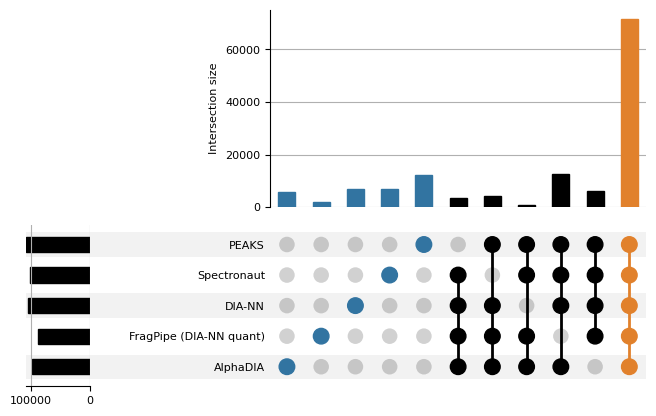

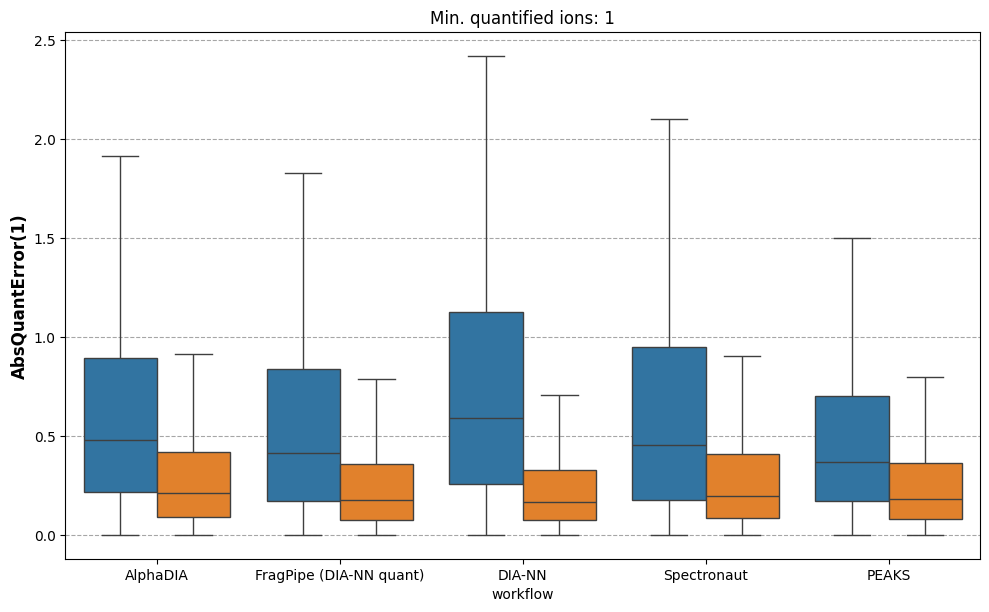

number of precursor ions before filtering:
171227
AlphaDIA
FragPipe (DIA-NN quant)
DIA-NN
Spectronaut
PEAKS


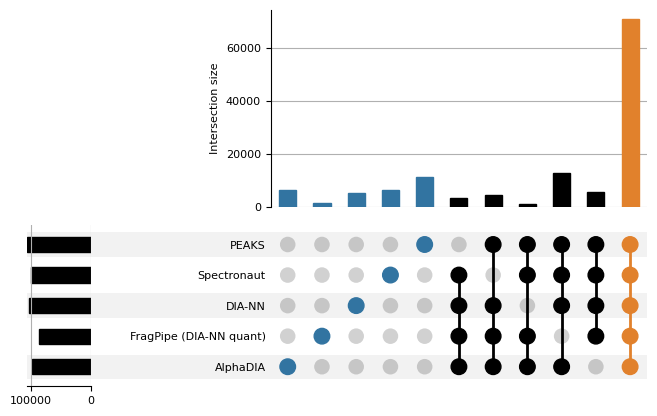

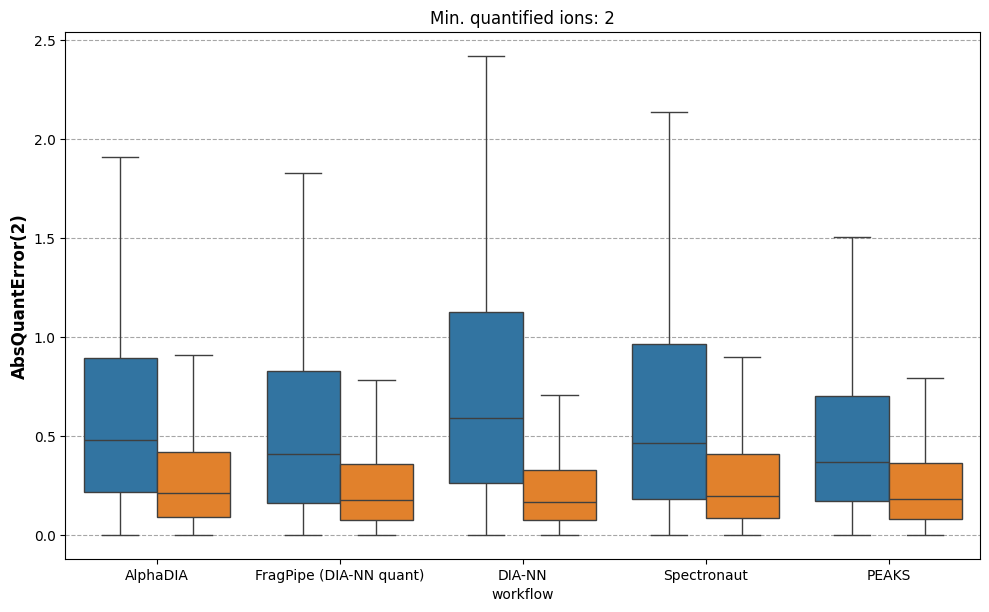

number of precursor ions before filtering:
160735
AlphaDIA
FragPipe (DIA-NN quant)
DIA-NN
Spectronaut
PEAKS


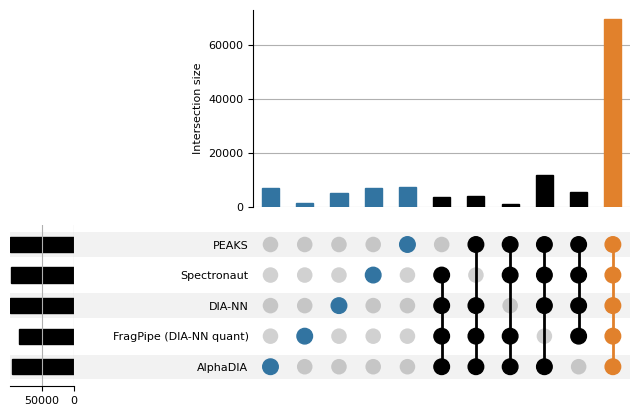

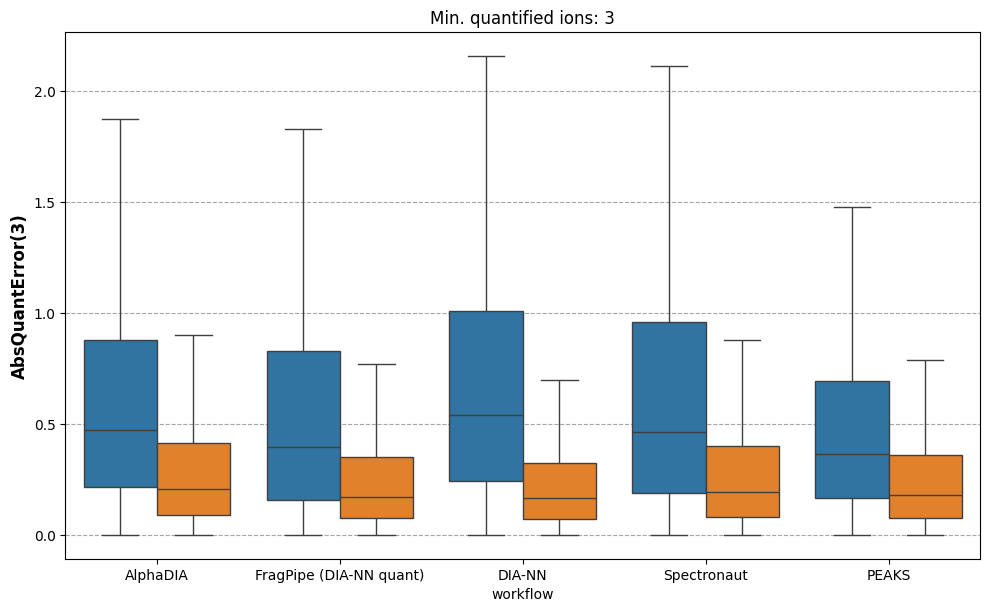

number of precursor ions before filtering:
147461
AlphaDIA
FragPipe (DIA-NN quant)
DIA-NN
Spectronaut
PEAKS


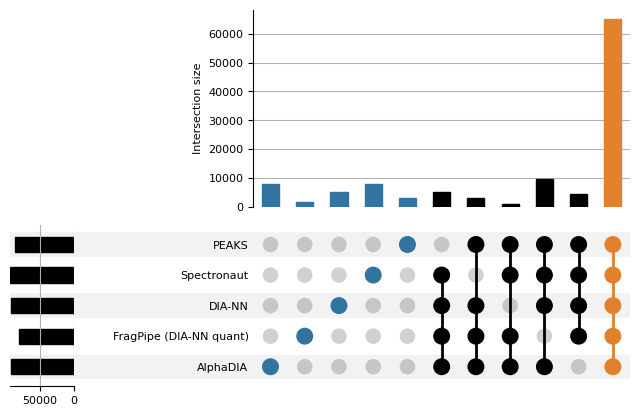

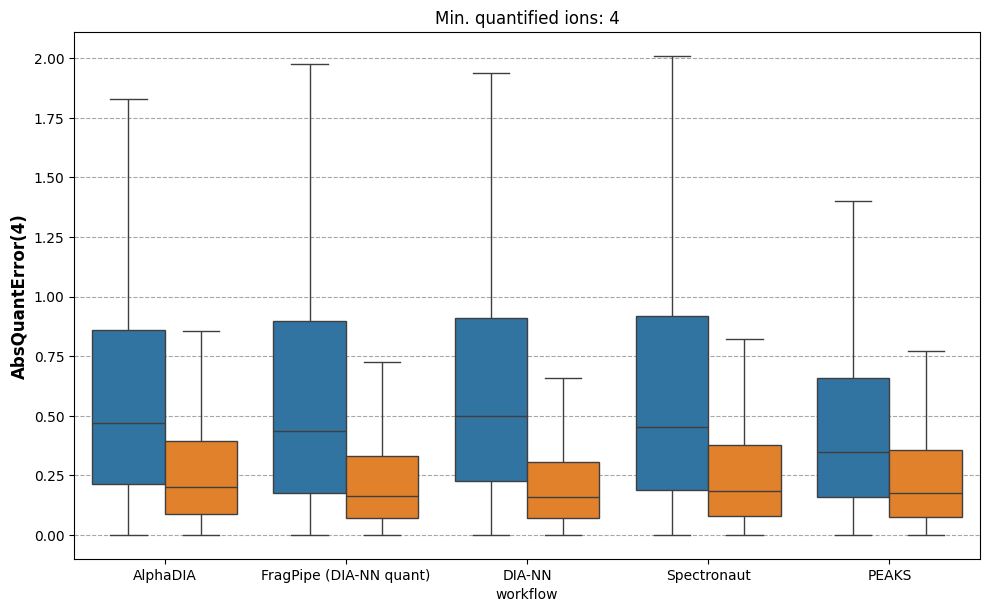

number of precursor ions before filtering:
135920
AlphaDIA
FragPipe (DIA-NN quant)
DIA-NN
Spectronaut
PEAKS


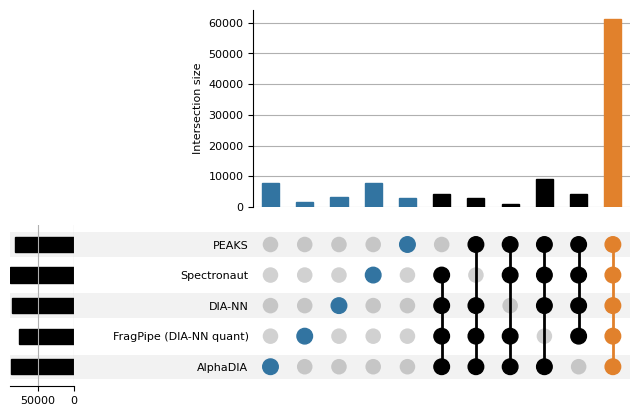

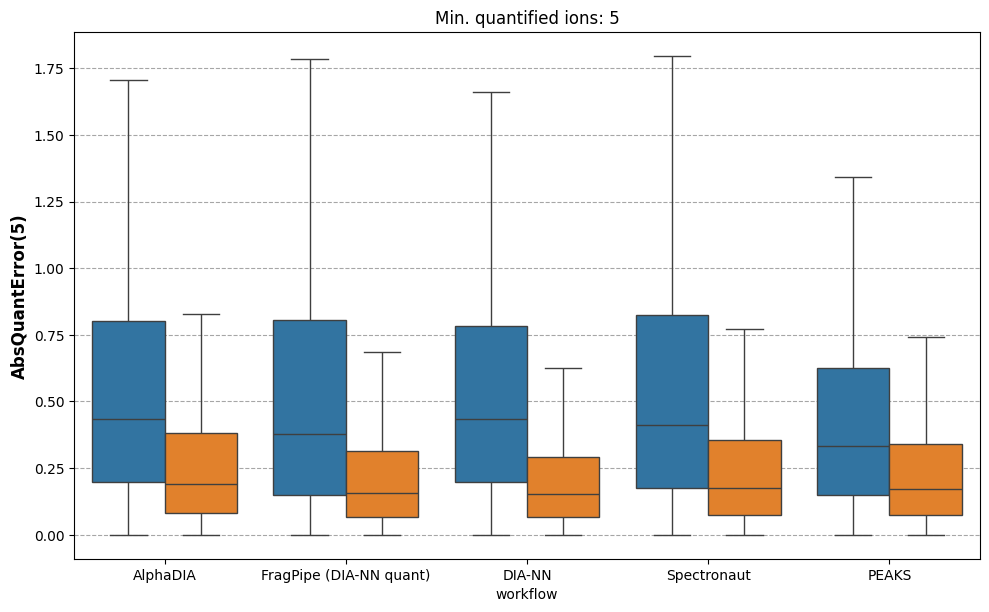

number of precursor ions before filtering:
118700
AlphaDIA
FragPipe (DIA-NN quant)
DIA-NN
Spectronaut
PEAKS


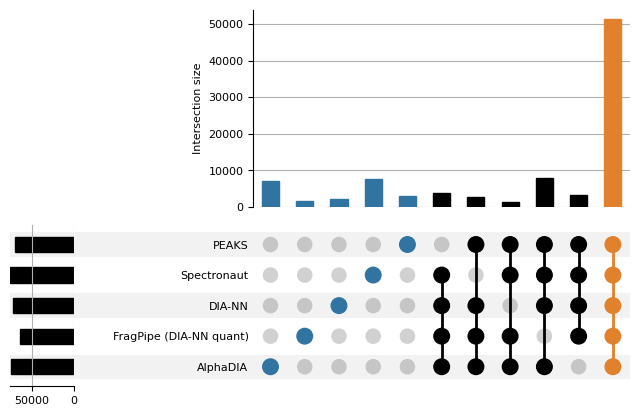

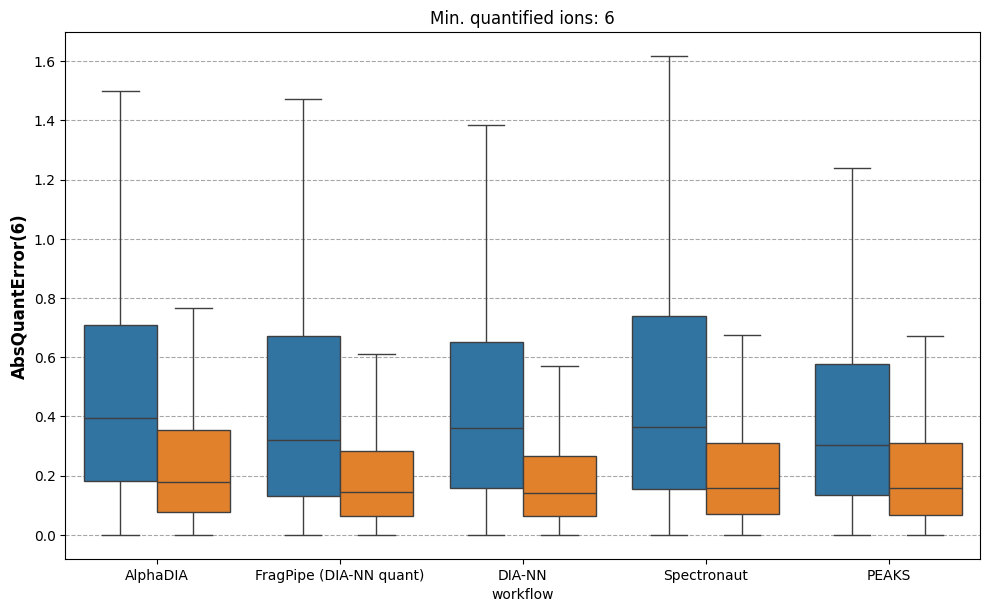

In [108]:
fig = plot_upset_and_boxplot_all_filters(
    performance_df_dict, all_tools_mapper, save_path="/mnt/d/Proteobench_manuscript_data/figures_manuscript/"
)

# A look at precursor quantification for e.coli and yeast precursors

In [116]:
def plot_pair_quantifications(
    results,
    subset,
):
    if subset:
        results = {k: {sk: v for sk, v in inner_dict.items() if sk in subset} for k, inner_dict in results.items()}

    lprec = {}
    for tool, subdict in results.items():
        for hashe, df in subdict.items():
            precursors = df["precursor ion"].unique()
            lprec[hashe] = precursors

    # prepare the data for the pair plot
    lplot = []
    for i, (tool, subdict) in enumerate(results.items()):
        for hashe, df in subdict.items():
            res = df[["precursor ion", "log2_A_vs_B", "species"]].copy()
            res["tool"] = tool
            lplot.append(res)

    gtab = pd.concat(lplot, ignore_index=True)
    gtab_wide = gtab.pivot_table(index=["species", "precursor ion"], columns="tool", values="log2_A_vs_B")

    # Get limits for the plots
    lims = np.max(np.abs(gtab[gtab["species"].isin(["ECOLI", "YEAST"])]["log2_A_vs_B"].dropna()))
    lims = (-lims, lims)

    # Create the pair plot for E. coli
    ecoli = gtab_wide[gtab_wide.index.get_level_values("species") == "ECOLI"].reset_index()
    g = sns.pairplot(ecoli.drop(columns=["species", "precursor ion"]), plot_kws={"alpha": 0.1})

    # Apply same axis limits to all subplots in E. coli pairplot
    for i, ax in enumerate(g.axes.flatten()):
        # Skip the diagonal subplots (i.e., where row == column)
        if not i % len(g.axes) == i // len(g.axes):  # Diagonal check
            ax.axhline(y=-2, linestyle="--", linewidth=0.5)
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.axvline(x=-2, linestyle="--", linewidth=0.5)

    plt.suptitle("E. coli Pairplot")
    plt.tight_layout()
    plt.show()

    # Plot for yeast
    yeast = gtab_wide[gtab_wide.index.get_level_values("species") == "YEAST"].reset_index()
    g = sns.pairplot(yeast.drop(columns=["species", "precursor ion"]), plot_kws={"alpha": 0.1})

    # Apply same axis limits to all subplots in Yeast pairplot
    for i, ax in enumerate(g.axes.flatten()):
        # Skip the diagonal subplots (i.e., where row == column)
        if not i % len(g.axes) == i // len(g.axes):  # Diagonal check
            ax.axhline(y=1, linestyle="--", linewidth=0.5)
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.axvline(x=1, linestyle="--", linewidth=0.5)

    plt.suptitle("Yeast Pairplot")
    plt.tight_layout()
    plt.show()


def plot_pair_quantifications_combined(results, subset=None):
    """
    Create a combined pair plot comparing log2(A vs B) fold-changes across multiple tools
    using E. coli (lower triangle) and Yeast (upper triangle) precursor ions.

    Parameters:
        results (dict): Dictionary mapping tool name -> dict of {hash -> DataFrame} with
                        columns ['precursor ion', 'log2_A_vs_B', 'species'].
        subset (list, optional): List of tool names to include in the plot.
    """
    # Filter hashes
    if subset:
        results = {k: {sk: v for sk, v in inner_dict.items() if sk in subset} for k, inner_dict in results.items()}

    tools = list(results.keys())

    # Aggregate DataFrames per tool
    tool_data = {}
    for tool in tools:
        dfs = [df.copy() for df in results[tool].values()]
        tool_data[tool] = pd.concat(dfs, ignore_index=True)

    # Extract species-specific data for each tool, indexed by precursor ion
    e_coli_vals = {}
    yeast_vals = {}
    for tool, df in tool_data.items():
        ecoli_df = df[df["species"].str.upper() == "ECOLI"]
        yeast_df = df[df["species"].str.upper() == "YEAST"]
        e_coli_vals[tool] = ecoli_df.set_index("precursor ion")["log2_A_vs_B"]
        yeast_vals[tool] = yeast_df.set_index("precursor ion")["log2_A_vs_B"]

    # Determine global log2 limits
    all_vals = pd.concat([s.dropna() for d in [e_coli_vals, yeast_vals] for s in d.values()])
    lim = np.ceil(np.percentile(np.abs(all_vals), 99.5)) * 1.1 if not all_vals.empty else 1.0

    # Colors
    col_ecoli = "#1f77b4"
    col_yeast = "#ff7f0e"

    n = len(tools)
    fig, axes = plt.subplots(n, n, figsize=(3 * n, 3 * n))

    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            tool_i = tools[i]
            tool_j = tools[j]

            if i == j:
                ec_vals = e_coli_vals[tool_i].dropna()
                yt_vals = yeast_vals[tool_i].dropna()
                if not ec_vals.empty:
                    sns.kdeplot(ec_vals, ax=ax, color=col_ecoli, fill=True, alpha=0.4)
                if not yt_vals.empty:
                    sns.kdeplot(yt_vals, ax=ax, color=col_yeast, fill=True, alpha=0.4)
                ax.axvline(-2, linestyle="--", color=col_ecoli, lw=1)
                ax.axvline(1, linestyle="--", color=col_yeast, lw=1)
                ax.set_xlim(-lim, lim)
                if not i == 0:
                    ax.yaxis.set_visible(False)
                if not j == n - 1:
                    ax.xaxis.set_visible(False)

            elif i > j:  # E. coli: lower triangle
                ax.set_facecolor(to_rgba(col_ecoli, alpha=0.1))
                x = e_coli_vals[tool_j]
                y = e_coli_vals[tool_i]
                common = x.index.intersection(y.index)
                ax.scatter(x.loc[common], y.loc[common], color=col_ecoli, alpha=0.3, s=10)
                ax.axhline(-2, linestyle="--", color="gray", lw=0.8)
                ax.axvline(-2, linestyle="--", color="gray", lw=0.8)
                ax.set_xlim(-lim, lim)
                ax.set_ylim(-lim, lim)

            else:  # Yeast: upper triangle
                ax.set_facecolor(to_rgba(col_yeast, alpha=0.1))
                x = yeast_vals[tool_j]
                y = yeast_vals[tool_i]
                common = x.index.intersection(y.index)
                ax.scatter(x.loc[common], y.loc[common], color=col_yeast, alpha=0.3, s=10)
                ax.axhline(1, linestyle="--", color="gray", lw=0.8)
                ax.axvline(1, linestyle="--", color="gray", lw=0.8)
                ax.set_xlim(-lim, lim)
                ax.set_ylim(-lim, lim)

            # Clean ticks
            if i < n - 1:
                ax.set_xticks([])
            else:
                ax.set_xlabel(tool_j)
            if j > 0:
                ax.set_yticks([])
            else:
                ax.set_ylabel(tool_i)

    # Final layout and legend
    fig.legend(
        handles=[
            plt.Line2D([0], [0], color=col_ecoli, lw=4, label="E. coli"),
            plt.Line2D([0], [0], color=col_yeast, lw=4, label="Yeast"),
        ],
        loc="upper right",
        bbox_to_anchor=(1.09, 0.99),
        title="Species",
    )
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(
        "/mnt/d/Proteobench_manuscript_data/figures_manuscript/pair_quantifications_combined.png",
        bbox_inches="tight",
        dpi=600,
    )
    plt.show()

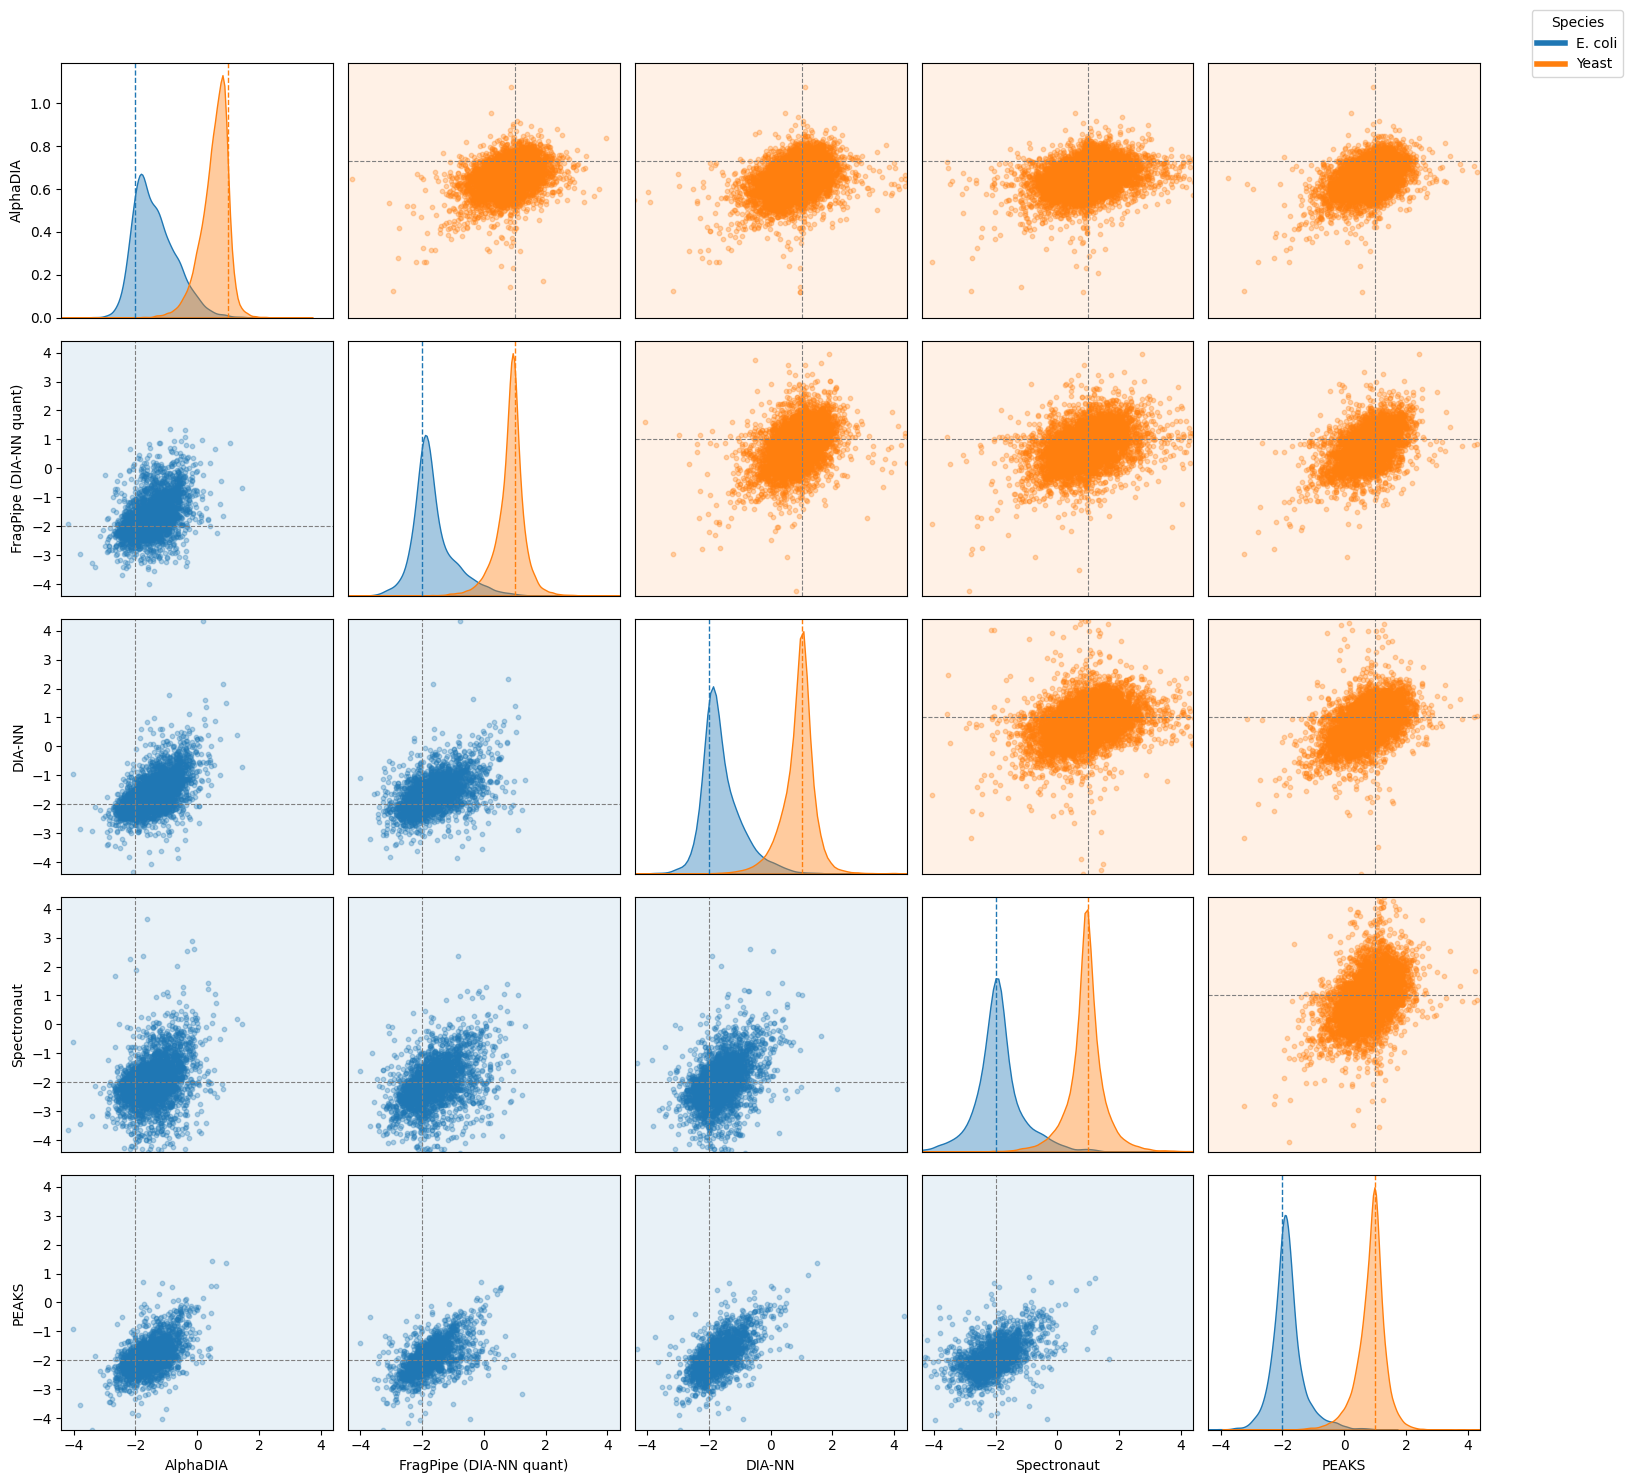

In [121]:
plot_pair_quantifications_combined(results_dict, subset=subset_hashes)

# Comparison with diaPASEF

In [69]:
from proteobench.modules.quant.quant_lfq_ion_DIA_diaPASEF import (
    DIAQuantIonModulediaPASEF,
)

diapasef_module = DIAQuantIonModulediaPASEF("token")

In [70]:
relevant_points_diapasef = (
    diaPASEF_df[~diaPASEF_df["software_name"].isin(["MaxQuant"])][["software_name", "intermediate_hash"]]
    .set_index("intermediate_hash")
    .to_dict()["software_name"]
)

In [71]:
results_dict_diaPASEF, all_datapoints_diaPASEF = extract_all_from_hashes(
    relevant_points_diapasef,
    data_dir="extracted_files",
    module=diapasef_module,
)

Processing 0c976edd998139880e0b9ef9ae9ba2cc0fe811db - PEAKS
Raw data files found: [PosixPath('extracted_files/0c976edd998139880e0b9ef9ae9ba2cc0fe811db/input_file.csv')]
Parameter files found: [PosixPath('extracted_files/0c976edd998139880e0b9ef9ae9ba2cc0fe811db/param_0..txt')]
Processing 170da3745034ca03d85988edcfcbdd7ec96206c1 - AlphaDIA
Raw data files found: [PosixPath('extracted_files/170da3745034ca03d85988edcfcbdd7ec96206c1/input_file.tsv')]
Parameter files found: [PosixPath('extracted_files/170da3745034ca03d85988edcfcbdd7ec96206c1/param_0..txt')]
Secondary raw data files found: [PosixPath('extracted_files/170da3745034ca03d85988edcfcbdd7ec96206c1/input_file_secondary.tsv')]
software_name AlphaDIA
search_engine AlphaDIA
quantification_method DirectLFQ
predictors_library AlphaPeptDeep
enable_match_between_runs True
min_peptide_length 6
max_peptide_length 30
min_precursor_charge 1
max_precursor_charge 5
enzyme trypsin/p 
min_precursor_mz 400
max_precursor_mz 1000
min_fragment_mz 50
max

In [72]:
all_datapoints_diaPASEF

,id,software_name,software_version,search_engine,search_engine_version,ident_fdr_psm,ident_fdr_peptide,ident_fdr_protein,enable_match_between_runs,precursor_mass_tolerance,...,max_peptide_length,is_temporary,intermediate_hash,results,median_abs_epsilon,mean_abs_epsilon,nr_prec,comments,proteobench_version,old_new
0,PEAKS_20251027_180427,PEAKS,13 20250520,PEAKS,13 20250520,1.0%,1.0%,,True,Auto Detected,...,30,True,b0a37efafe69c5c846f772305c06bad61410898b,"{6: {'median_abs_epsilon': 0.1477747649071679,...",0.163186,0.233657,102341,,0.5.16.dev13+gf14d0f6.d20250121,old
1,AlphaDIA_20251027_180446,AlphaDIA,1.12.1,AlphaDIA,None,0.01,None,0.01,True,"[-15 ppm, 15 ppm]",...,30,True,170da3745034ca03d85988edcfcbdd7ec96206c1,"{6: {'median_abs_epsilon': 0.1641322771712863,...",0.194924,0.309458,83552,,0.5.16.dev13+gf14d0f6.d20250121,old
2,Spectronaut_20251027_180514,Spectronaut,19.5.241126.62635,Spectronaut,19.5.241126.62635,0.01,,0.01,False,Dynamic,...,52,True,c3ea0408c9e538971b5778ac435fc02f27d65a2a,{6: {'median_abs_epsilon': 0.14780521185918793...,0.162195,0.276569,126486,,0.5.16.dev13+gf14d0f6.d20250121,old
3,DIA-NN_20251027_180537,DIA-NN,1.9.2,DIA-NN,1.9.2,0.01,None,None,True,"[-13.8504 ppm, 13.8504 ppm]",...,30,True,2b63aca2b90df457cf7e2cedf78ca9a7bdb40a5a,{6: {'median_abs_epsilon': 0.12415123589702226...,0.143195,0.218901,105535,,0.5.16.dev13+gf14d0f6.d20250121,old
4,DIA-NN_20251027_180555,DIA-NN,2.2.0 Academia,DIA-NN,2.2.0 Academia,0.01,None,None,True,"[-11 ppm, 11 ppm]",...,30,True,85a7f4eea2244c7ea4db1407d56e62fdb1385964,{6: {'median_abs_epsilon': 0.12399768829345703...,0.143322,0.216105,119119,,0.5.16.dev13+gf14d0f6.d20250121,old
5,AlphaDIA_20251027_180620,AlphaDIA,1.10.3,AlphaDIA,None,0.01,None,0.01,True,"[-10 ppm, 10 ppm]",...,30,True,bb37d526974ebcd952bbba58daf78b056362b8c9,"{6: {'median_abs_epsilon': 0.1946040789378234,...",0.214111,0.325642,113402,,0.5.16.dev13+gf14d0f6.d20250121,old
6,AlphaDIA_20251027_180638,AlphaDIA,1.10.3,AlphaDIA,None,0.01,None,0.01,True,"[-10 ppm, 10 ppm]",...,30,True,d7aa2c5ee603e45281dea52907447621ddb354d0,{6: {'median_abs_epsilon': 0.19034147262682666...,0.207547,0.318793,80697,,0.5.16.dev13+gf14d0f6.d20250121,old
7,FragPipe (DIA-NN quant)_20251027_180701,FragPipe (DIA-NN quant),23.0,MSFragger,4.3,0.01,,0.01,False,"[-10 ppm, 10 ppm]",...,50,True,541a02acfa99c19e7921f64ed59f2a2c1d17916b,{6: {'median_abs_epsilon': 0.11758682479413096...,0.128045,0.203996,86709,,0.5.16.dev13+gf14d0f6.d20250121,old
8,PEAKS_20251027_180716,PEAKS,,PEAKS,,1.0%,,1.0%,True,Auto Detected,...,30,True,64c7d6d0fdbdb3eaf8e5d17d263c2985b0246013,{6: {'median_abs_epsilon': 0.18216184763777044...,0.221165,0.343521,95821,,0.5.16.dev13+gf14d0f6.d20250121,old
9,AlphaDIA_20251027_180732,AlphaDIA,1.12.1,AlphaDIA,None,0.01,None,0.01,False,"[-15 ppm, 15 ppm]",...,30,True,61e5aa4f0b50dc3a6f3fe8fafdd0aa131905a3a3,"{6: {'median_abs_epsilon': 0.1490705807930519,...",0.181787,0.278641,61982,,0.5.16.dev13+gf14d0f6.d20250121,old


In [73]:
subset_hashes_diapasef = [
    "85a7f4eea2244c7ea4db1407d56e62fdb1385964",  # DIA-NN, corresponds to e24e82b93910c326f524d49f844c36024e016076 in all_datapoints_diaPASEF
    "829432aa5955a64d185144843588afc2c3610de6",  # Spectronaut
    "b0a37efafe69c5c846f772305c06bad61410898b",  # PEAKS
    "8f9c72a7c277c7d0ab08b7ffc1f4e9213702220d",  # AlphaDIA
    "fdad2a4d2e6fe409bbbb0ed2d6644ee100e288ba",
]

In [114]:
x_bounds = [0.120 - (0.120 * 0.05), 0.25 + (0.25 * 0.05)]
y_bounds = [70000 - (70000 * 0.05), 126486 + (126486 * 0.05)]

In [75]:
diaPASEF_df

,old_new,id,software_name,software_version,search_engine,search_engine_version,ident_fdr_psm,ident_fdr_peptide,ident_fdr_protein,enable_match_between_runs,...,results.1.CV_median,results.1.CV_q75,results.1.CV_q90,results.1.CV_q95,min_precursor_mz,max_precursor_mz,min_fragment_mz,max_fragment_mz,predictors_library,scan_window
0,new,PEAKS_20250714_150458,PEAKS,13 20250520,PEAKS,13 20250520,1.0%,1.0%,None,True,...,0.123864,0.206357,0.317399,0.403727,NaN,NaN,NaN,NaN,NaN,NaN
1,new,AlphaDIA_20251027_153904,AlphaDIA,1.12.1,AlphaDIA,NaN,0.01,NaN,0.01,True,...,0.129773,0.262218,0.403475,0.521711,400,1000,50,2000,AlphaPeptDeep,NaN
2,new,Spectronaut_20250609_135453,Spectronaut,19.5.241126.62635,Spectronaut,19.5.241126.62635,0.01,None,0.01,False,...,0.113767,0.194217,0.304197,0.397511,NaN,NaN,NaN,NaN,NaN,NaN
3,new,DIA-NN_20251027_131714,DIA-NN,1.9.2,DIA-NN,1.9.2,0.01,NaN,NaN,True,...,0.095551,0.166051,0.258375,0.327196,400,1000,50,2000,"{'RT': 'DIANN', 'IM': 'DIANN', 'MS2_int': 'DIA...",8
4,new,DIA-NN_20251027_131002,DIA-NN,2.2.0 Academia,DIA-NN,2.2.0 Academia,0.01,NaN,NaN,True,...,0.107002,0.185260,0.284327,0.357616,400,1000,50,2000,"{'RT': 'DIANN', 'IM': 'DIANN', 'MS2_int': 'DIA...",8
5,new,AlphaDIA_20250610_092314,AlphaDIA,1.10.3,AlphaDIA,NaN,0.01,NaN,0.01,True,...,0.153570,0.288701,0.419404,0.515748,NaN,NaN,NaN,NaN,NaN,NaN
6,new,AlphaDIA_20250610_091313,AlphaDIA,1.10.3,AlphaDIA,NaN,0.01,NaN,0.01,True,...,0.134302,0.271594,0.409775,0.522926,NaN,NaN,NaN,NaN,NaN,NaN
7,new,FragPipe (DIA-NN quant)_20251027_132715,FragPipe (DIA-NN quant),23.0,MSFragger,4.3,0.01,None,0.01,False,...,0.092995,0.167497,0.270237,0.350756,None,5000.0,None,None,nan,nan
8,new,PEAKS_20250611_082043,PEAKS,None,PEAKS,None,1.0%,None,1.0%,True,...,0.168669,0.310023,0.489079,0.620909,NaN,NaN,NaN,NaN,NaN,NaN
9,new,AlphaDIA_20251027_153616,AlphaDIA,1.12.1,AlphaDIA,NaN,0.01,NaN,0.01,False,...,0.114258,0.240768,0.378772,0.478155,400,1000,50,2000,AlphaPeptDeep,NaN


In [76]:
all_datapoints_diaPASEF

,id,software_name,software_version,search_engine,search_engine_version,ident_fdr_psm,ident_fdr_peptide,ident_fdr_protein,enable_match_between_runs,precursor_mass_tolerance,...,max_peptide_length,is_temporary,intermediate_hash,results,median_abs_epsilon,mean_abs_epsilon,nr_prec,comments,proteobench_version,old_new
0,PEAKS_20251027_180427,PEAKS,13 20250520,PEAKS,13 20250520,1.0%,1.0%,,True,Auto Detected,...,30,True,b0a37efafe69c5c846f772305c06bad61410898b,"{6: {'median_abs_epsilon': 0.1477747649071679,...",0.163186,0.233657,102341,,0.5.16.dev13+gf14d0f6.d20250121,old
1,AlphaDIA_20251027_180446,AlphaDIA,1.12.1,AlphaDIA,None,0.01,None,0.01,True,"[-15 ppm, 15 ppm]",...,30,True,170da3745034ca03d85988edcfcbdd7ec96206c1,"{6: {'median_abs_epsilon': 0.1641322771712863,...",0.194924,0.309458,83552,,0.5.16.dev13+gf14d0f6.d20250121,old
2,Spectronaut_20251027_180514,Spectronaut,19.5.241126.62635,Spectronaut,19.5.241126.62635,0.01,,0.01,False,Dynamic,...,52,True,c3ea0408c9e538971b5778ac435fc02f27d65a2a,{6: {'median_abs_epsilon': 0.14780521185918793...,0.162195,0.276569,126486,,0.5.16.dev13+gf14d0f6.d20250121,old
3,DIA-NN_20251027_180537,DIA-NN,1.9.2,DIA-NN,1.9.2,0.01,None,None,True,"[-13.8504 ppm, 13.8504 ppm]",...,30,True,2b63aca2b90df457cf7e2cedf78ca9a7bdb40a5a,{6: {'median_abs_epsilon': 0.12415123589702226...,0.143195,0.218901,105535,,0.5.16.dev13+gf14d0f6.d20250121,old
4,DIA-NN_20251027_180555,DIA-NN,2.2.0 Academia,DIA-NN,2.2.0 Academia,0.01,None,None,True,"[-11 ppm, 11 ppm]",...,30,True,85a7f4eea2244c7ea4db1407d56e62fdb1385964,{6: {'median_abs_epsilon': 0.12399768829345703...,0.143322,0.216105,119119,,0.5.16.dev13+gf14d0f6.d20250121,old
5,AlphaDIA_20251027_180620,AlphaDIA,1.10.3,AlphaDIA,None,0.01,None,0.01,True,"[-10 ppm, 10 ppm]",...,30,True,bb37d526974ebcd952bbba58daf78b056362b8c9,"{6: {'median_abs_epsilon': 0.1946040789378234,...",0.214111,0.325642,113402,,0.5.16.dev13+gf14d0f6.d20250121,old
6,AlphaDIA_20251027_180638,AlphaDIA,1.10.3,AlphaDIA,None,0.01,None,0.01,True,"[-10 ppm, 10 ppm]",...,30,True,d7aa2c5ee603e45281dea52907447621ddb354d0,{6: {'median_abs_epsilon': 0.19034147262682666...,0.207547,0.318793,80697,,0.5.16.dev13+gf14d0f6.d20250121,old
7,FragPipe (DIA-NN quant)_20251027_180701,FragPipe (DIA-NN quant),23.0,MSFragger,4.3,0.01,,0.01,False,"[-10 ppm, 10 ppm]",...,50,True,541a02acfa99c19e7921f64ed59f2a2c1d17916b,{6: {'median_abs_epsilon': 0.11758682479413096...,0.128045,0.203996,86709,,0.5.16.dev13+gf14d0f6.d20250121,old
8,PEAKS_20251027_180716,PEAKS,,PEAKS,,1.0%,,1.0%,True,Auto Detected,...,30,True,64c7d6d0fdbdb3eaf8e5d17d263c2985b0246013,{6: {'median_abs_epsilon': 0.18216184763777044...,0.221165,0.343521,95821,,0.5.16.dev13+gf14d0f6.d20250121,old
9,AlphaDIA_20251027_180732,AlphaDIA,1.12.1,AlphaDIA,None,0.01,None,0.01,False,"[-15 ppm, 15 ppm]",...,30,True,61e5aa4f0b50dc3a6f3fe8fafdd0aa131905a3a3,"{6: {'median_abs_epsilon': 0.1490705807930519,...",0.181787,0.278641,61982,,0.5.16.dev13+gf14d0f6.d20250121,old


In [115]:
plot = plot_performance_metrics(
    all_datapoints_diaPASEF,
    x_range=x_bounds,
    y_range=y_bounds,
    metric="Median",
    min_quant=3,
)
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/diapasef_median_performance.svg",
)
plot

In [80]:
x_bounds = [0.203 - (0.203 * 0.05), 0.344 + (0.344 * 0.05)]
y_bounds = [80697 - (80697 * 0.05), 126486 + (126486 * 0.05)]

In [81]:
plot = plot_performance_metrics(
    all_datapoints_diaPASEF,
    x_range=x_bounds,
    y_range=y_bounds,
    metric="Mean",
    min_quant=3,
)
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/diaPASEF_mean_performance.svg",
)
plot

In [94]:
x_bounds = [0.100 - (0.100 * 0.05), 0.223 + (0.223 * 0.05)]
y_bounds = [50000 - (50000 * 0.05), 146000 + (146000 * 0.05)]

In [95]:
plot = plot_performance_metrics_all_filters(
    all_datapoints_diaPASEF,
    x_range=x_bounds,
    y_range=y_bounds,
    metric="Median",
)
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/diapasef_median_performance_all_filters.svg",
)
plot

In [98]:
x_bounds = [0.150 - (0.150 * 0.05), 0.5 + (0.5 * 0.05)]
y_bounds = [50000 - (50000 * 0.05), 148000 + (148000 * 0.05)]

In [99]:
plot = plot_performance_metrics_all_filters(
    all_datapoints_diaPASEF,
    x_range=x_bounds,
    y_range=y_bounds,
    metric="Mean",
)
plot.write_image(
    "/mnt/d/Proteobench_manuscript_data/figures_manuscript/diapasef_mean_performance_all_filters.svg",
)
plot